# Ford GoBike Trip 
## by Emmanuel Gonzalez

## Investigation Overview

>This investigation primarily focuses on exploring, analyzing and vizualizing the bike usage of Ford Gobike customers and subscribers.Through this investigation we hope to discern any patterns or characteristics that could help to get a better understanding of the users.Bay Wheels is a regional public bicycle sharing system in California's San Francisco Bay Area.Bay Wheels is the first regional and large-scale bicycle sharing system deployed in California and on the West Coast of the United States. It was established as Bay Area Bike Share in August 2013. As of January 2018, the Bay Wheels system had over 2,600 bicycles in 262 stations across San Francisco, East Bay and San Jose.

## Dataset Overview

> The Ford Gobike dataset consists of monthly trip data for 2018. which contains the trip information, in total the dataset contains 1863721 registered trips with 21 variables(duration_sec,start_time,end_time,start_station_id start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude end_station_longitude,bike_id,user_type). Below are the vizualizations created with the cleaned data wrangled from their website.


In [8]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")


In [9]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('fordgobike_2018_clean.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1823470 entries, 0 to 1823469
Data columns (total 20 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             int64  
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         float64
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bike_id                  int64  
 12  user_type                object 
 13  bike_share_for_all_trip  object 
 14  duration_min             float64
 15  duration_hours           float64
 16  start_date               object 
 17  start_timeofday          int64  
 18  start_day                object 
 19  start_month              object 
dtypes: float64(8), int64(3), object(9)
memory usag

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Member Usage By Month

> Subscriber usage is significantly higer than regular customer usage every day of the week. the highest volume of usage is on workdays which would sugest subscribers use the bikes mostly to commute.on the weekends the subscriber usage goes down significantly and the regular customer increased slightly. The time of day usage for subscribers also peaks during rush hour between 7am-9am and 4pm-6pm that seems to imply that they use the service to comute back and forth from work.

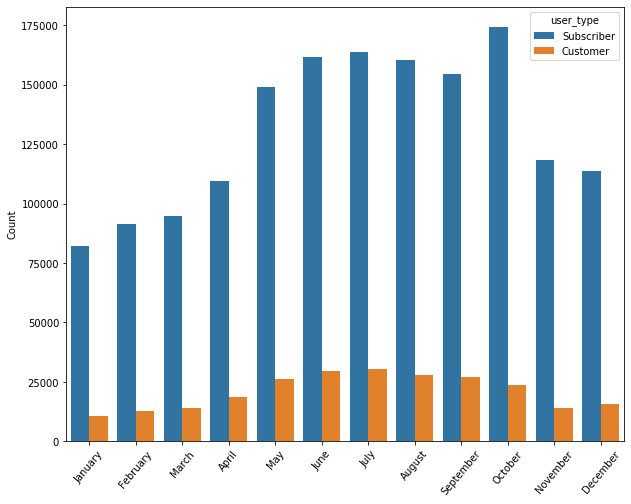

In [20]:
plt.figure(figsize=(10,8))
sb.countplot(data=df, x='start_month', hue='user_type');
plt.xticks(rotation=50);
plt.xlabel('');
plt.ylabel('Count');

## Total daily trips per hour for Customers and Subscribers

> The heatmaps shown here further corroborate what was seen in the previous section. The usage patterns between subscribers/customer are clearly different, Subscribers use the service heavily Mon-Fri going and coming from work.Simmilarly Customers seem to also use the service at simmilar times as Subscribers but in much less volume,with the majority instead mostly riding during the weekend or later in the afternoon.

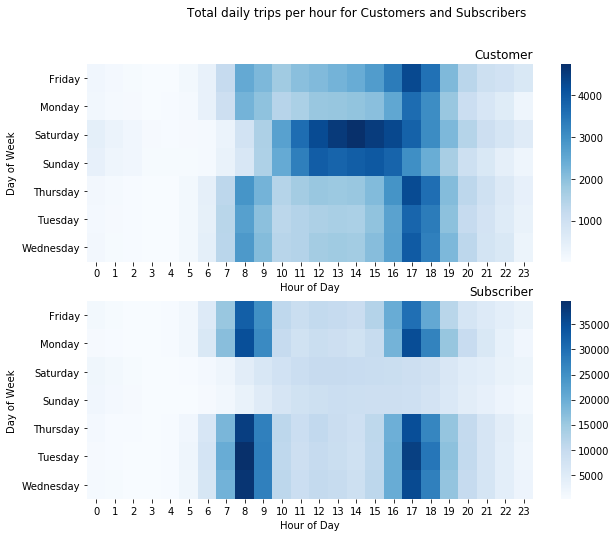

In [18]:
plt.figure(figsize=(10,8))
plt.suptitle('Total daily trips per hour for Customers and Subscribers')

plt.subplot(2, 1, 1)
customers = df.query('user_type == "Customer"')
ct_counts = customers.groupby(['start_day', 'start_timeofday']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index='start_day', columns='start_timeofday', values='count')
sb.heatmap(ct_counts, cmap='Blues');
plt.title('Customer', loc='right');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');


plt.subplot(2, 1, 2)
subscribers = df.query('user_type == "Subscriber"')
st_counts = subscribers.groupby(['start_day', 'start_timeofday']).size()
st_counts = st_counts.reset_index(name='count')
st_counts = st_counts.pivot(index='start_day', columns='start_timeofday', values='count')
sb.heatmap(st_counts, cmap='Blues');
plt.title('Subscriber', loc='right');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');

## Member Usage Per Hour of Day

> Subscriber usage is significantly higer than regular customer usage every day of the week. the highest volume of usage is on workdays which would sugest subscribers use the bikes mostly to commute.on the weekends the subscriber usage goes down significantly and the regular customer increased slightly. The time of day usage for subscribers also peaks during rush hour between 7am-9am and 4pm-6pm that seems to imply that they use the service to comute back and forth from work.


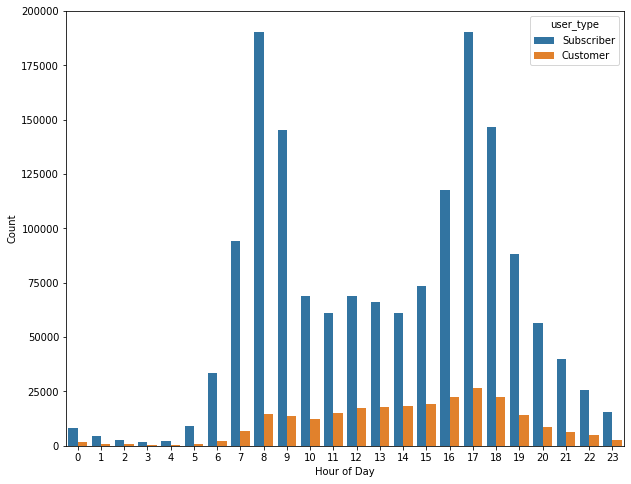

In [19]:
plt.figure(figsize=(10,8))
sb.countplot(data=df, x='start_timeofday', hue='user_type');
plt.xlabel('Hour of Day');
plt.ylabel('Count');

## Summary

>As shown through the visualizations its obvious there are more subscribers than customers. The usage of the bikes vary between the subscribers and customers, the subscribers seem to use the bikes mostly during rush hour in the morning and afternoon, while the customers use the bikes for recreational purpose in the afternoons and evenings.The multivariate exploration strengthened some of the patterns discovered in the previous bivariate exploration as well as univariate exploration The short period of usage for subscribers corresponds to their high concentration on rush hours Monday through Friday, indicating the use is most likely primarily for work commute. The pattern of customer use shows that they're mostly using the bike sharing system differently from the subscribers, mostly during weekends and in the afternoon.